# ***Pandas practics 1*** #

So, there's a little project to apply some pandas functions to data analysis. <br>
To make my practical experience easier, I will resolve some tasks that are given in the Stepic course: https://stepik.org/course/74457/syllabus

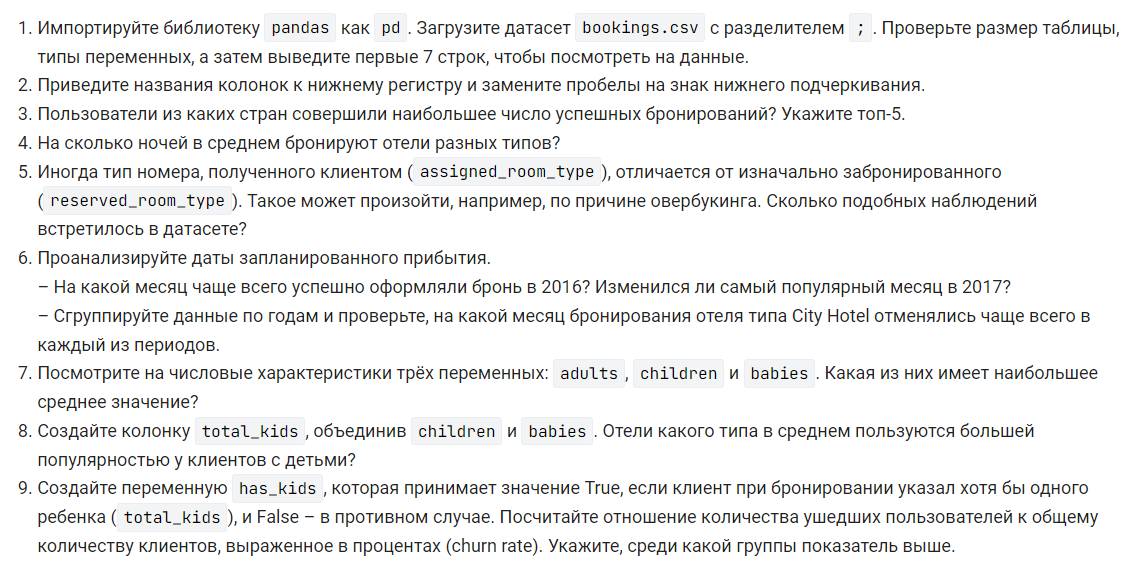

A translation for English speakers:
> 1. Import module __pandas__ as __pd__. Download the dataset __bookings.csv__ with separator __;__ (In Russia, comma __,__ is used to separate decimal places in float numbers, so in __.csv__ it's better to use __;__ as separator). Check a shape of the table, types, and then output first 7 lines to take a look at the data.
> 2. Reduce the names of the columns to lowercase and replace spaces ' ' to underlinings '\_'.
> 3. Users from which countries have made the largest number of successful bookings? Show top-5.
> 4. For how many nights different hotels are booked in average?
> 5. Sometimes the type of room gotten by a client (__assigned_room_type__) is different from the originally booked. It can happen, for example, because of overbooking. How many such cases are in the dataset?
> 6. Analyze dates of sheduled arrivals: 
    - On which month there's most of successful bookings in 2016? Did the most popular month change in 2017?
    - Group the data by years and check out, on which month of booking the hotel of type _City Hotel_ were canceled mostly in every year.
> 7. Check the numerical characteristics __adults__, __children__, __babies__. Which one is biggest in average?
> 8. Create a column __total_kids__, joining __children__ and __babies__. Hotels of what kind are mostly prefered by clients with children in average?
> 9. Create a variable __has_kids__, which takes the value __True__, if a client has taken at least one kid (__total_kids__) and __False__ otherwise. Calculate the ratio of the amound of departed users to the total amount of clients, and show it in percent (__churn rate__). Point out the groups, where the indicator is higher.

In [2]:
import pandas as pd

Importing the main module for the work and preparing the dataframe from the .csv file, which is situated on Stepik platform.

In [3]:
bookings = pd.read_csv('https://stepik.org/media/attachments/lesson/360344/bookings.csv', sep=';')

Well. Now we're gonna output first 7 lines of dataframe to take a look at the data.

In [4]:
bookings.head(7)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,...,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-03


Researching some info about the data

In [5]:
bookings.shape

(119390, 21)

In [6]:
bookings.dtypes

Hotel                         object
Is Canceled                    int64
Lead Time                      int64
arrival full date             object
Arrival Date Year              int64
Arrival Date Month            object
Arrival Date Week Number       int64
Arrival Date Day of Month      int64
Stays in Weekend nights        int64
Stays in week nights           int64
stays total nights             int64
Adults                         int64
Children                     float64
Babies                         int64
Meal                          object
Country                       object
Reserved Room Type            object
Assigned room type            object
customer type                 object
Reservation Status            object
Reservation status_date       object
dtype: object

Make columns' names to lower case and replace spaces to underlining. It will get us more comfortable names for manipulations

In [7]:
bookings.columns = map(lambda x: x.replace(' ', '_').lower() if ' ' in x else x.lower(), bookings.columns)
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


It's funny to see the number of children in float type.
Did someone take just a head of his child with him? :) <br>
I __must__ check it out!!!

In [8]:
bookings.query("children % 1 != 0 and children >= 0")

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date


Well... No one cannibal or psychopath here!

Great! Now we're ready for some analysis. Let's find top-5 countries, from which were made the largest amount of successful bookings.

In [9]:
successful_countries = bookings.query("is_canceled == 0").groupby('country').count().nlargest(5, 'is_canceled')
successful_countries

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
country,,,,,,,,,,,,,,,,,,,,
PRT,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071,21071
GBR,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676
FRA,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481
ESP,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391,6391
DEU,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069,6069


Here are Portugal, Great Britain, France, Spain, Germany

In [10]:
hotel_booking_nights = bookings.groupby('hotel').mean('stays_total_nights')['stays_total_nights']
round(hotel_booking_nights, 2)

hotel
City Hotel      2.98
Resort Hotel    4.32
Name: stays_total_nights, dtype: float64

We found an average amount of booked nights in each hotel type above. <br>
And now we're gonna resolve task 5 (I'm lazy to write it here, just read it in the beginning of the file)

In [11]:
bookings.query("reserved_room_type != assigned_room_type").shape[0]

14917

Let's find out the most popular months for booking in 2016 and 2017

In [12]:
bookings.query("arrival_date_year == 2016 or arrival_date_year == 2017") \
        .groupby(['arrival_date_year', 'arrival_date_month']) \
        .count() \
        .nlargest(2, 'hotel')

,,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
arrival_date_year,arrival_date_month,,,,,,,,,,,,,,,,,,,
2017,May,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313,6313
2016,October,6203,6203,6203,6203,6203,6203,6203,6203,6203,6203,6203,6203,6203,6176,6203,6203,6203,6203,6203


Looking for months of every year, when there's most of all cancellations in City Hotels

In [14]:
subset = bookings.query("hotel == 'City Hotel' and is_canceled == 1")
subset.groupby(['arrival_date_year', 'arrival_date_month']).count()

hotel  is_canceled  lead_time  \
arrival_date_year arrival_date_month                                  
2015              August               1232         1232       1232   
                  December              668          668        668   
                  July                  939          939        939   
                  November              301          301        301   
                  October              1321         1321       1321   
                  September            1543         1543       1543   
2016              April                1539         1539       1539   
                  August               1247         1247       1247   
                  December             1072         1072       1072   
                  February              930          930        930   
                  January               438          438        438   
                  July                 1043         1043       1043   
                  June                 1720         1720       1720   
                  March                1108         1108       1108   
                  May                  1436         1436       1436   
                  November             1360         1360       1360   
                  October              1947         1947       1947   
                  September            1567         1567       1567   
2017              April                1926         1926       1926   
                  August               1123         1123       1123   
                  February              971          971        971   
                  January              1044         1044       1044   
                  July                 1324         1324       1324   
                  June                 1808         1808       1808   
                  March                1278         1278       1278   
                  May                  2217         2217       2217   

                                      arrival_full_date  \
arrival_date_year arrival_date_month                      
2015              August                           1232   
                  December                          668   
                  July                              939   
                  November                          301   
                  October                          1321   
                  September                        1543   
2016              April                            1539   
                  August                           1247   
                  December                         1072   
                  February                          930   
                  January                           438   
                  July                             1043   
                  June                             1720   
                  March                            1108   
                  May                              1436   
                  November                         1360   
                  October                          1947   
                  September                        1567   
2017              April                            1926   
                  August                           1123   
                  February                          971   
                  January                          1044   
                  July                             1324   
                  June                             1808   
                  March                            1278   
                  May                              2217   

                                      arrival_date_week_number  \
arrival_date_year arrival_date_month                             
2015              August                                  1232   
                  December                                 668   
                  July                                     939   
                  November                                 301   


So, answer is: September of 2015, October of 2016 and May of 2017 <br>
We're gonna compare means of columns __adults__, __children__ and __babies__ below

In [15]:
round(bookings[['adults', 'children', 'babies']].mean(), 2)

adults      1.86
children    0.10
babies      0.01
dtype: float64

Of course, it was obviously, but we had to clarify...

Task 8 is next...

In [16]:
bookings['total_kids'] = bookings['children'] + bookings['babies'] 
kids_stat = bookings.groupby(['hotel']).agg({'total_kids': 'mean'})
round(kids_stat, 2)

,total_kids
hotel,
City Hotel,0.10
Resort Hotel,0.14


Here's a conclusion that resort hotels are more popular among families with children than city hotels. <br>
And finally, the last task. We're gonna find out a relationship between cancellations and having children.

In [60]:
bookings['has_kids'] = bookings['total_kids'] > 0 # New column, takes True if user has at least 1 child, else False

kids_cancelled = bookings.query('has_kids == True and is_canceled == 1').value_counts('has_kids')
kids = bookings.query('has_kids == True').value_counts('has_kids')
churn_rate_kids = round(kids_cancelled / kids * 100, 2)

free_cancelled = bookings.query('has_kids == False and is_canceled == 1').value_counts('has_kids')
free = bookings.query('has_kids == False').value_counts('has_kids')
churn_rate_free = round(free_cancelled / free * 100, 2)

print(churn_rate_kids, churn_rate_free, sep='\n\n')

has_kids
True    34.92
dtype: float64

has_kids
False    37.22
dtype: float64


So a conclusion is: people without kids are more changeable because of... some reasons? Idk, that's not my problem anymore